# Red Wine Draft 3

# Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import datetime
import sqlite3

from IPython.display import display
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Display Parameters

## Display Features

In [29]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Colors

In [30]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"

## Figure Parameters

In [31]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Load Raw Data

In [32]:
redwine = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\RedWine\\DataSets\\winequality-red.csv",
    index_col=False,
)

In [33]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


In [34]:
# redwine['quality'] = redwine['quality'].replace([8], 1)
# redwine['quality'] = redwine['quality'].replace([3, 4, 5, 6, 7], 0)
# redwine.head()

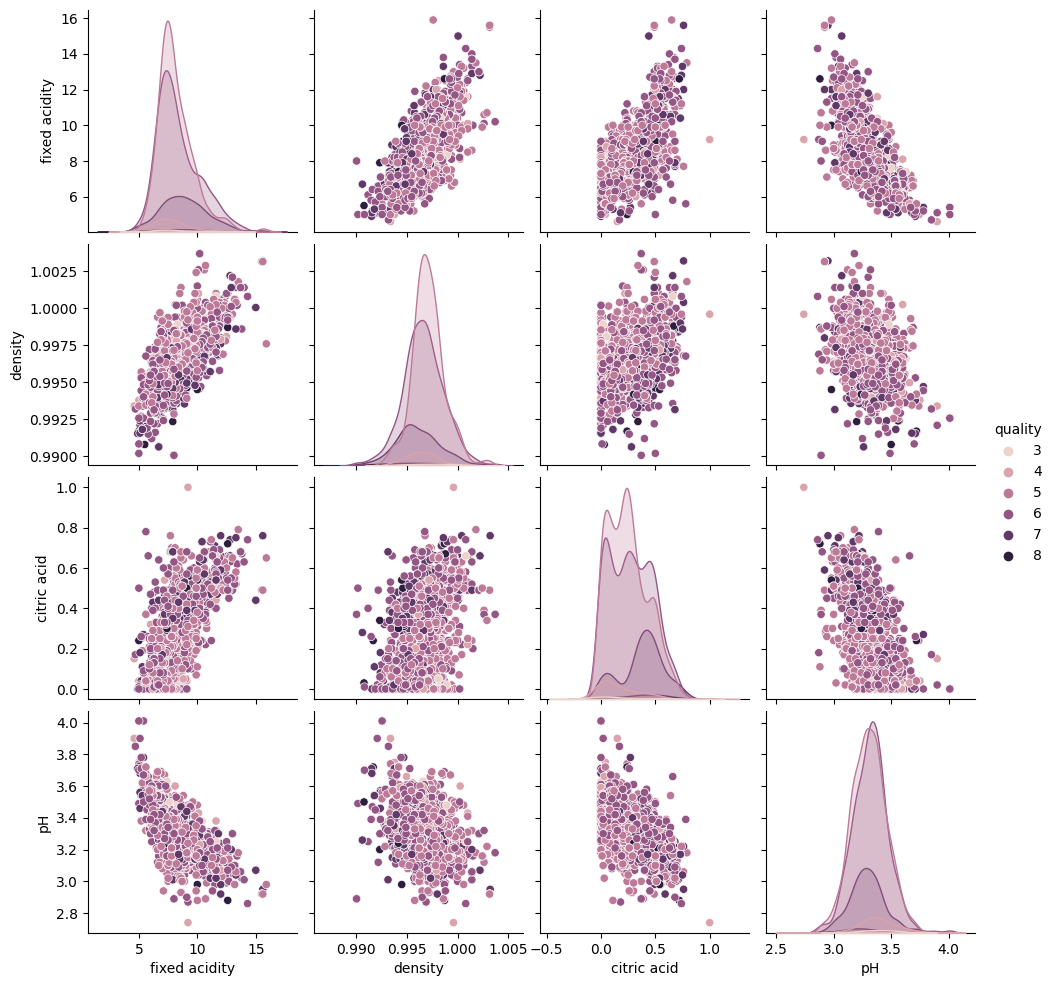

In [35]:
df=redwine[['fixed acidity','density','citric acid','pH', 'quality']]
sns.pairplot(df, hue='quality')
plt.show()

In [36]:
df1=redwine[['fixed acidity','density','citric acid','pH']]

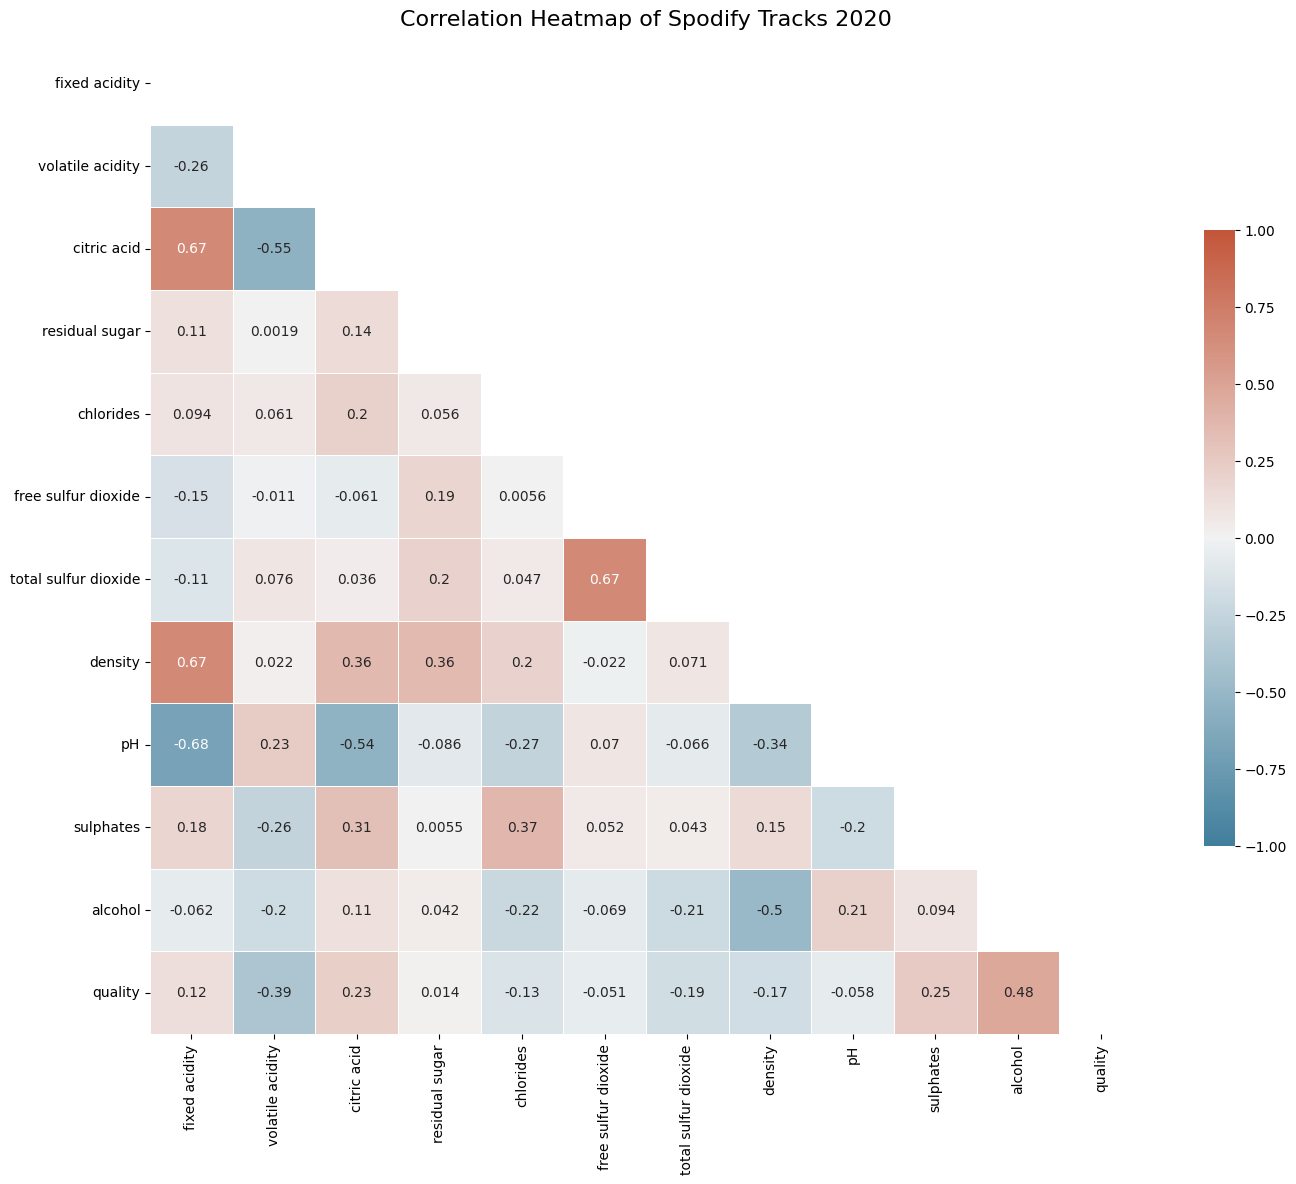

In [37]:
corr = redwine.corr()

mask = np.triu(np.ones_like(corr, dtype = bool))

f, ax = plt.subplots(figsize = (16, 16))

cmap = sns.diverging_palette(230, 20, as_cmap = True)
heatmap = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
)

heatmap.set_title(
    "Correlation Heatmap of Spodify Tracks 2020",
    fontdict={"fontsize": 16},
    pad=12,
)
plt.xlabel("")
plt.ylabel("");